### Reasons for selection

The reason I chose this topic is because I want to understand the issue of climate change and use data to present what I want to understand

### Imports and overview

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sb
import datetime as dt

In [2]:
# importing dataset
df = pd.read_csv('GlobalTemperatures.csv')
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# check data status
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


### Check duplicates

In [4]:
# check if there's any duplicates (no)
df.duplicated().value_counts()

False    3192
dtype: int64

### Turn the original date column into 3 seperated cloumns

In [5]:
# change datatype of dt column to datetime
df['dt'] = pd.to_datetime(df['dt'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   dt                                         3192 non-null   datetime64[ns]
 1   LandAverageTemperature                     3180 non-null   float64       
 2   LandAverageTemperatureUncertainty          3180 non-null   float64       
 3   LandMaxTemperature                         1992 non-null   float64       
 4   LandMaxTemperatureUncertainty              1992 non-null   float64       
 5   LandMinTemperature                         1992 non-null   float64       
 6   LandMinTemperatureUncertainty              1992 non-null   float64       
 7   LandAndOceanAverageTemperature             1992 non-null   float64       
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64       
dtypes: datetime64[ns](1)

In [6]:
df['year_added'] = df['dt'].dt.year
df['month_added'] = df['dt'].dt.month
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year_added,month_added
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5
...,...,...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015,8
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015,9
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015,10
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,2015,11


### deal with Null values

In [7]:
df.isnull().any() # deal with col['LandAverageTemperature'] first

dt                                           False
LandAverageTemperature                        True
LandAverageTemperatureUncertainty             True
LandMaxTemperature                            True
LandMaxTemperatureUncertainty                 True
LandMinTemperature                            True
LandMinTemperatureUncertainty                 True
LandAndOceanAverageTemperature                True
LandAndOceanAverageTemperatureUncertainty     True
year_added                                   False
month_added                                  False
dtype: bool

In [8]:
#df[df.isnull().any(axis=1)]
#df.isnull().any(axis=1)
df[df['LandAverageTemperature'].isnull()] # no need to add '.any(axis=1)' since we have assigned a certain column
# .any() returns the boolean value of the whole column

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year_added,month_added
10,1750-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1750,11
16,1751-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1751,5
18,1751-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1751,7
21,1751-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1751,10
22,1751-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1751,11
23,1751-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1751,12
25,1752-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1752,2
28,1752-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1752,5
29,1752-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1752,6
30,1752-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1752,7


In [9]:
# define month as category
month = df.groupby('month_added')
# use the corresponding month's 'LandAverageTemperature' to fill the NaN value in col[LandAverageTemperature]
df['LandAverageTemperature'].fillna(value=df.groupby('month_added')
                                    ['LandAverageTemperature'].transform('mean'), inplace=True)
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year_added,month_added
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5
...,...,...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015,8
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015,9
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015,10
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,2015,11


### (a) Is there a global warming?

In [10]:
year = df.groupby('year_added')
# find the average temperature based on year
year.get_group(1750)['LandAverageTemperature'].mean()

8.471283775252527

In [11]:
avg_temp = []
for i in range(1750, 2016):
    avg_temp.append(year.get_group(i)['LandAverageTemperature'].mean())

print(len(avg_temp))

266


Text(0, 0.5, 'Temperature')

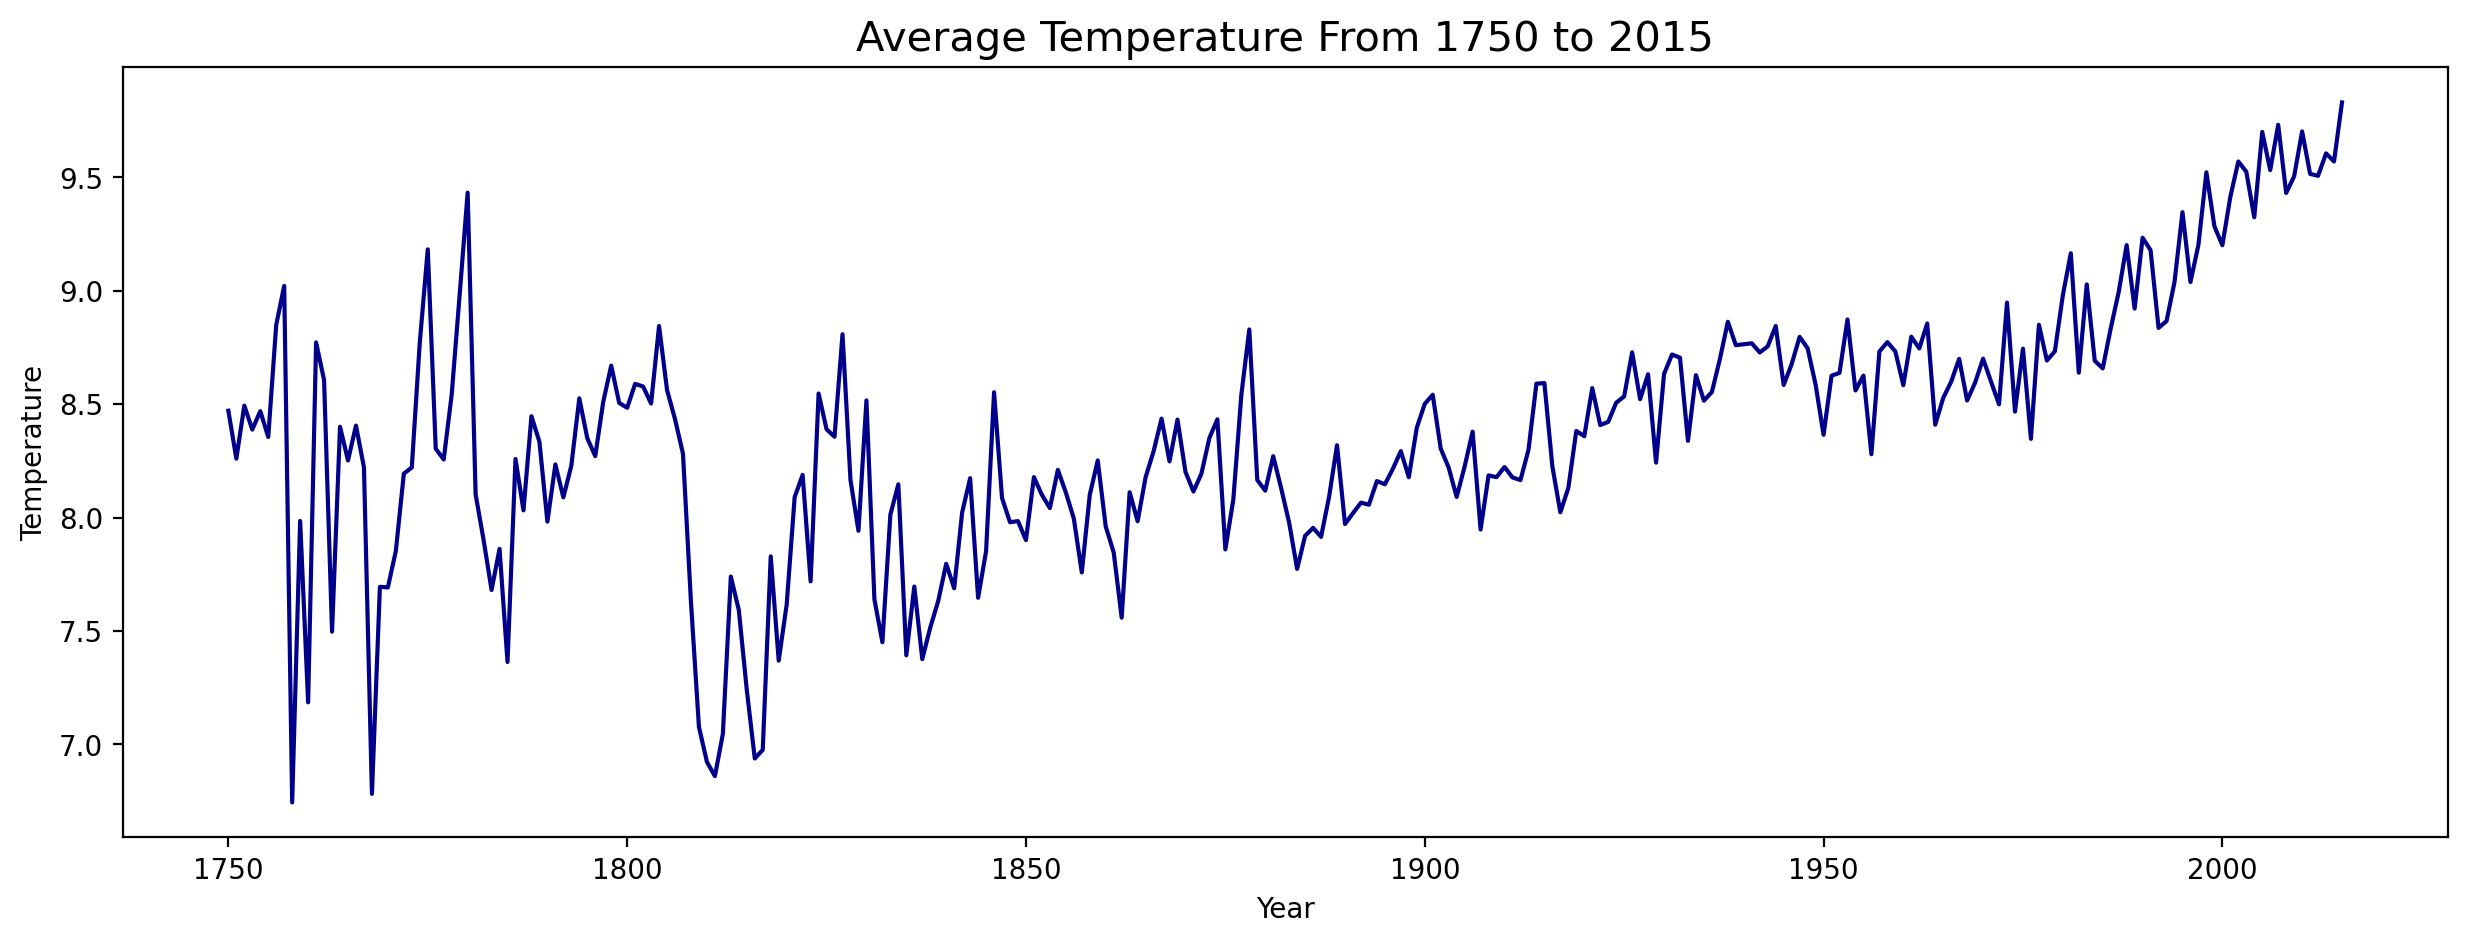

In [12]:
x = np.arange(1750, 2016)
plt.figure(figsize=(15, 5)) # lengthen the chart
plt.plot(x, avg_temp, c='darkblue')
plt.title("Average Temperature From 1750 to 2015", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Temperature")

According to the chart above, the average temperature has shown a segmental increase since 1800. The situation has worsened even further since 1950. Thus, it is safe to say that global warming does exist.

### (b) Find the fastest temperature growth period

In [13]:
largest_growth = 0
largest_growth_month = 0

for i in range(1, len(df)):
    if (df['LandAverageTemperature'][i] - df['LandAverageTemperature'][i - 1]) > largest_growth:
        largest_growth = df['LandAverageTemperature'][i] - df['LandAverageTemperature'][i - 1]
        largest_growth_month = df['dt'][i]

print(largest_growth)
print(largest_growth_month)

8.176
1770-04-01 00:00:00


The largest everage temperature growth between months: 1770-03 ~ 1770-04

In [14]:
largest_growth = 0
largest_growth_year = 0

for i in range(1, len(avg_temp)):
    if avg_temp[i] - avg_temp[i - 1] > largest_growth:
        largest_growth = avg_temp[i] - avg_temp[i - 1]
        largest_growth_year = i + 1750
print(largest_growth)
print(largest_growth_year)

1.5873333333333317
1761


The largest everage temperature growth between years: 1760 ~ 1761

### (c) Find the hottest and coldest country

In [15]:
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [17]:
df.duplicated().value_counts() # no duplicates

False    577462
dtype: int64

In [18]:
# trun df['dt'] into datetime type and create new columns
df['dt'] = pd.to_datetime(df['dt'])
df['year_added'] = df['dt'].dt.year
df['month_added'] = df['dt'].dt.month
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year_added,month_added
0,1743-11-01,4.384,2.294,Åland,1743,11
1,1743-12-01,NaN,NaN,Åland,1743,12
2,1744-01-01,NaN,NaN,Åland,1744,1
3,1744-02-01,NaN,NaN,Åland,1744,2
4,1744-03-01,NaN,NaN,Åland,1744,3
...,...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013,5
577458,2013-06-01,17.613,0.473,Zimbabwe,2013,6
577459,2013-07-01,17.000,0.453,Zimbabwe,2013,7
577460,2013-08-01,19.759,0.717,Zimbabwe,2013,8


In [19]:
year = df.groupby('year_added')
# compute the NaN rate in 2012's AverageTemperature column
cnt = total = 0
for i in year.get_group(2012)['AverageTemperature'].isnull(): # isnull() returns True or False
    total += 1
    if i == True:
        cnt += 1
        
print(total, cnt, sep=',')
print(f"{cnt / total:.3f}%") # low rate won't effect the outcome
df = df.fillna(value=0) # use the value that won't effect the outcome to fill the NaN value

2916,12
0.004%


Given that the temperature data for many countries contains multiple NaN (missing) values after 2013, I'll determine the hottest and coldest country based on the completeness of the data and the relevance to the present. To do so, I'll find the country with the highest and lowest monthly average temperature in 2012 to represent the hottest and coldest country respectively.

In [20]:
df_2012 = df[df['year_added'] == 2012] # create a dataset with data from 2012 only
df_2012

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year_added,month_added
3218,2012-01-01,-0.943,0.345,Åland,2012,1
3219,2012-02-01,-3.454,0.246,Åland,2012,2
3220,2012-03-01,2.317,0.354,Åland,2012,3
3221,2012-04-01,2.935,0.399,Åland,2012,4
3222,2012-05-01,8.434,0.318,Åland,2012,5
...,...,...,...,...,...,...
577448,2012-08-01,18.946,1.127,Zimbabwe,2012,8
577449,2012-09-01,22.609,0.643,Zimbabwe,2012,9
577450,2012-10-01,23.482,0.574,Zimbabwe,2012,10
577451,2012-11-01,24.606,0.532,Zimbabwe,2012,11


In [21]:
# A groupby categorized by ['Country'] and ['month_added'] column with data from 2012 only
country = df_2012.groupby(['Country', 'month_added'])
country.get_group(('Åland', 12))

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year_added,month_added
3229,2012-12-01,-3.417,0.384,Åland,2012,12


In [22]:
# create country list
country_list = []
for i in df_2012['Country']:
    if i not in country_list: # avoid duplicates
        country_list.append(i)

print(len(country_list)) # number correct

243


In [23]:
lowest_temp = []
highest_temp = []

for i in country_list:
    lowest = 100
    highest = -100
    for j in range(1, 13):
        temp = float(country.get_group((i, j))['AverageTemperature']) # float64 type doesn't work 
        if temp < lowest:
            lowest = temp
        if temp > highest:
            highest = temp
    lowest_temp.append(lowest)
    highest_temp.append(highest)

In [24]:
# create dictionaries
low_dict = dict()
high_dict = dict()
for i in range(len(country_list)):
    low_dict[country_list[i]] = lowest_temp[i]
    high_dict[country_list[i]] = highest_temp[i]

In [25]:
lowest = min(low_dict, key=low_dict.get)
print('The coldest country: ' + lowest)
highest = max(high_dict, key=high_dict.get)
print('The hottest country: ' + highest)

The coldest country: Greenland
The hottest country: Kuwait


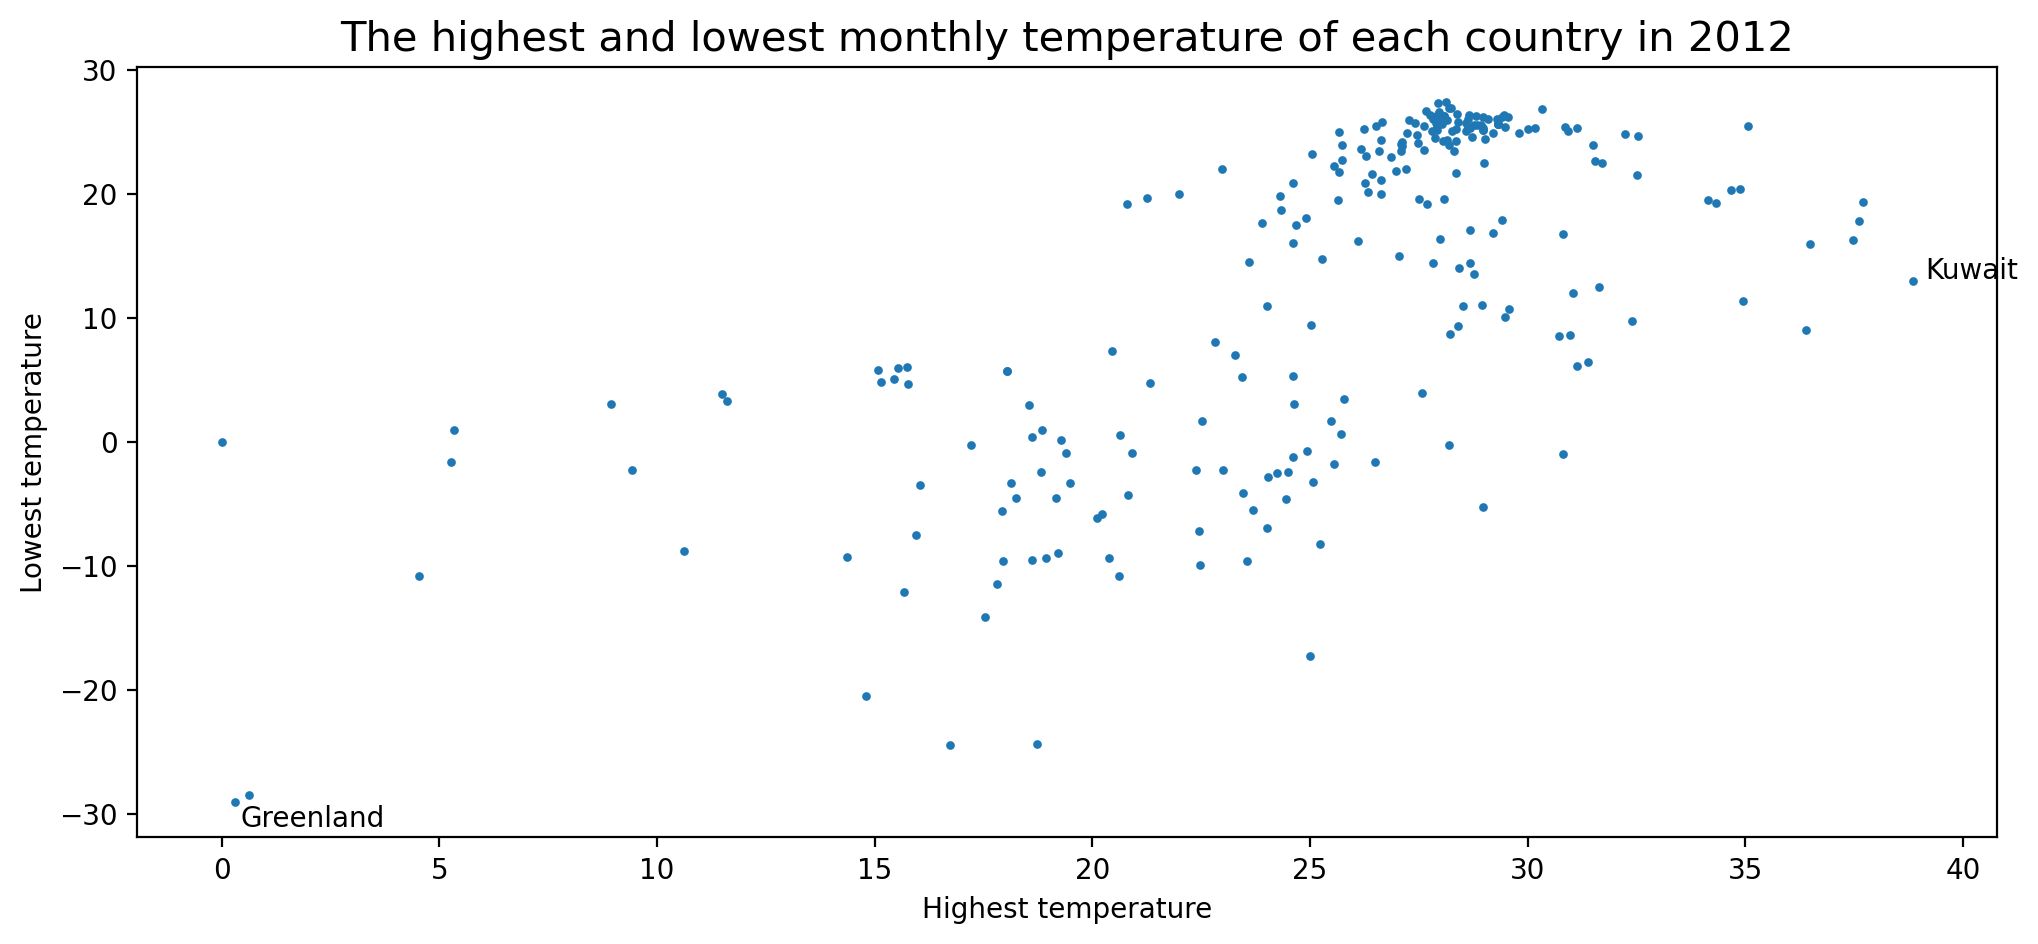

In [26]:
plt.figure(figsize=(12, 5))
plt.scatter(highest_temp, lowest_temp, s=4.5)
# create annotation and adjust its position
plt.annotate(lowest, (high_dict[lowest] + 0.14, low_dict[lowest] - 2))
plt.annotate(highest, (high_dict[highest] + 0.3, low_dict[highest] + 0.2))
# create titles and labels to the chart
plt.title("The highest and lowest monthly temperature of each country in 2012", fontsize=15)
plt.xlabel("Highest temperature")
plt.ylabel("Lowest temperature")
plt.show()

Based on the scatter chart above, the identity of which country is the coldest and hottest has been verified. However, the data of Antartica has to be noticed since that the amount of NaN values drastically decreased its readability.